# **Introdution**

# **Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_curve, roc_auc_score

# **Introduction**

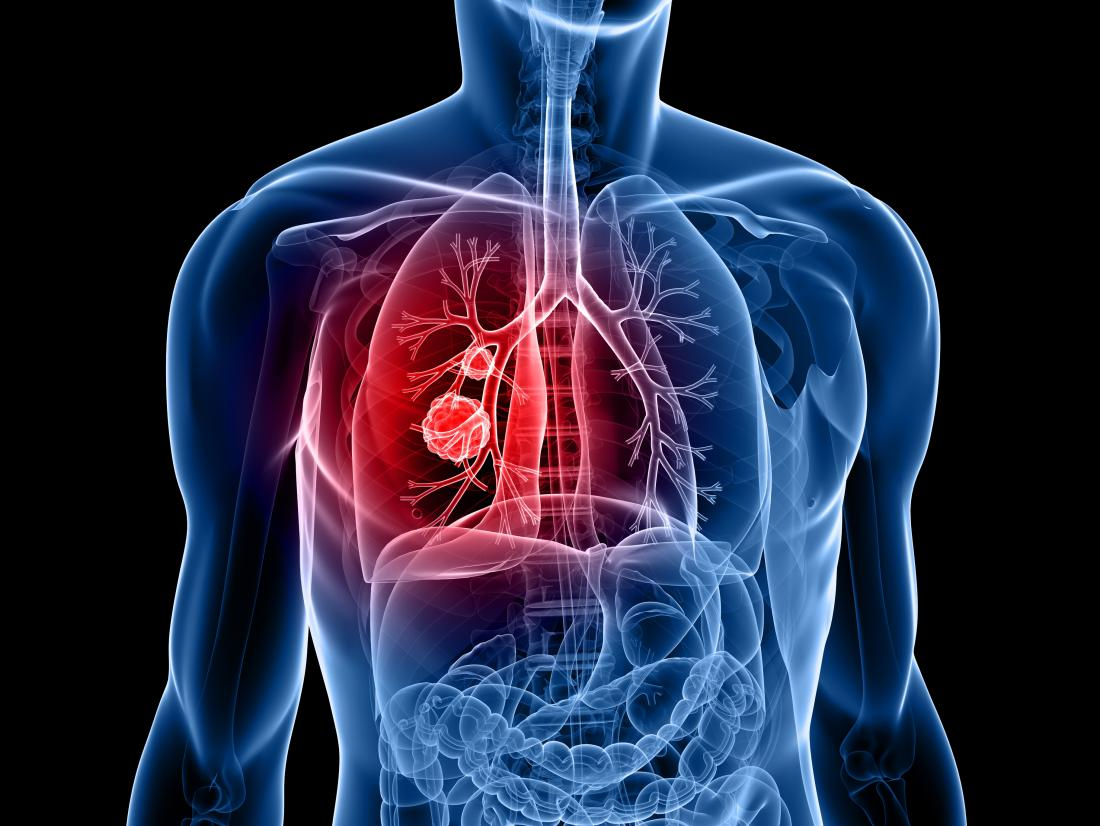

Cancer is a disease in which cells in the body grow out of control. When cancer starts in the lungs, it is called lung cancer.

Lung cancer begins in the lungs and may spread to lymph nodes or other organs in the body, such as the brain. Cancer from other organs also may spread to the lungs. When cancer cells spread from one organ to another, they are called metastases.

Lung cancers usually are grouped into two main types called small cell and non-small cell (including adenocarcinoma and squamous cell carcinoma). These types of lung cancer grow differently and are treated differently. Non-small cell lung cancer is more common than small cell lung cancer.

[References](https://www.cdc.gov/cancer/lung/basic_info/what-is-lung-cancer.htm)

# **About the dataset**

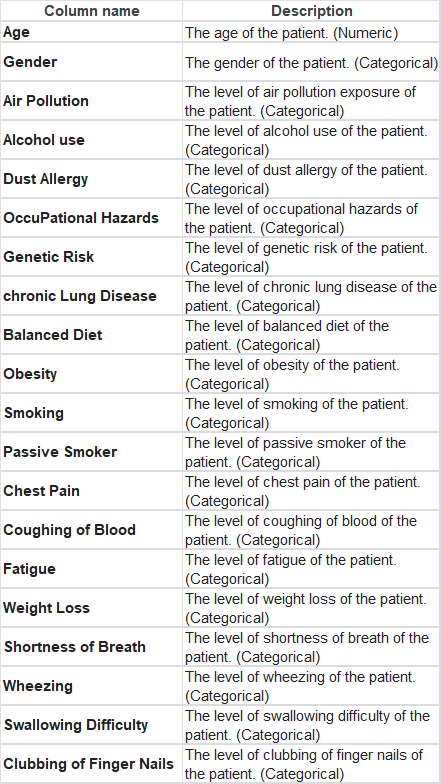

# **Reading the dataset**

In [4]:
dataset = pd.read_csv('cancer patient data sets.csv', sep = ',')
dataset.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
dataset.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
dataset = dataset.iloc[:, 2:]

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

# **Showing the informations**

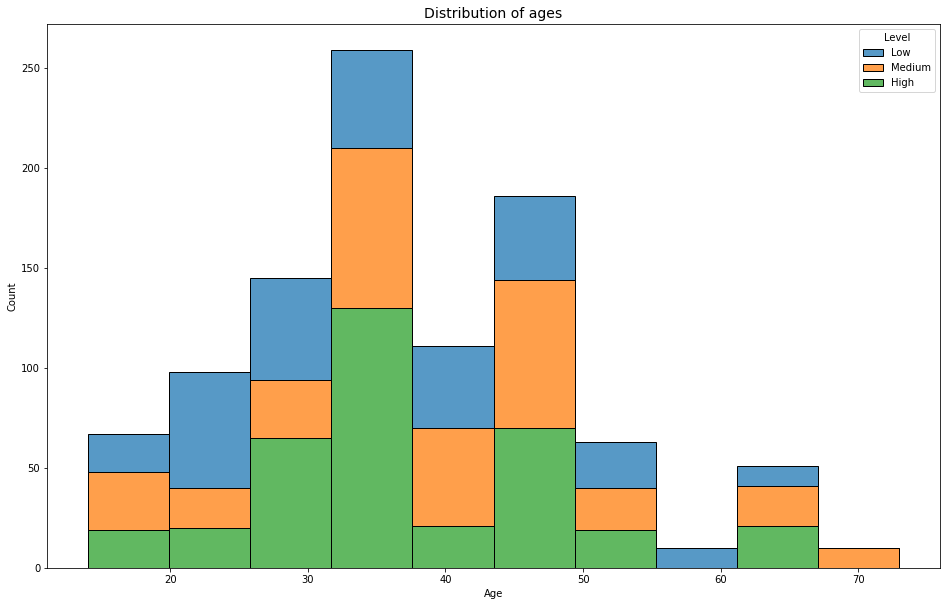

In [8]:
graph_hist = sns.histplot(data = dataset, x = 'Age', hue='Level', bins = 10, multiple = 'stack')
graph_hist.set_title('Distribution of ages', fontsize = 14)
graph_hist.figure.set_size_inches(16, 10)

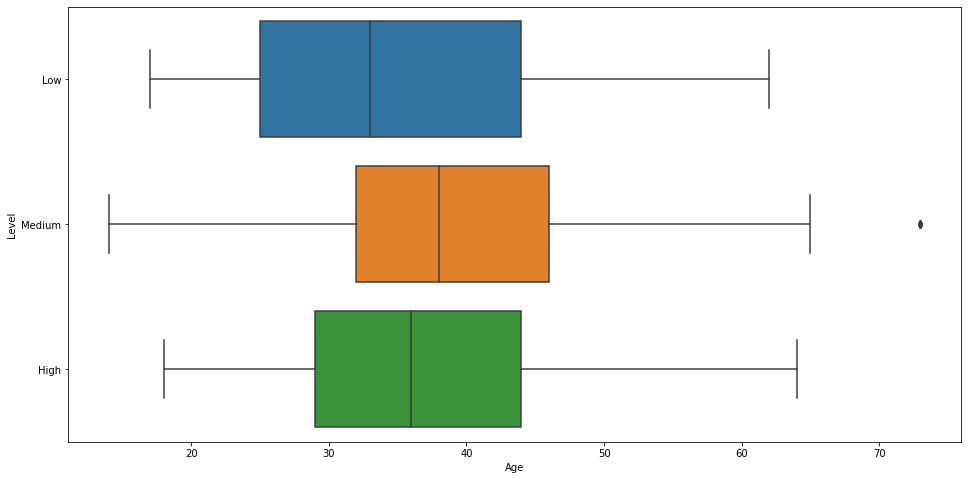

In [9]:
graph_box = sns.boxplot(data = dataset, x = 'Age', y = 'Level', orient = 'h')
graph_box.figure.set_size_inches(16, 8)

In [10]:
def graph_hist(x, title):
  graph_hist = sns.histplot(data = dataset, x = x, hue='Level', multiple = 'dodge')
  graph_hist.set_title(title, fontsize = 14)
  graph_hist.figure.set_size_inches(14, 10)

def graph_box(x):
  graph_box = sns.boxplot(data = dataset, x = 'Alcohol use', y = 'Level', orient = 'h')
  graph_box.figure.set_size_inches(16, 8)

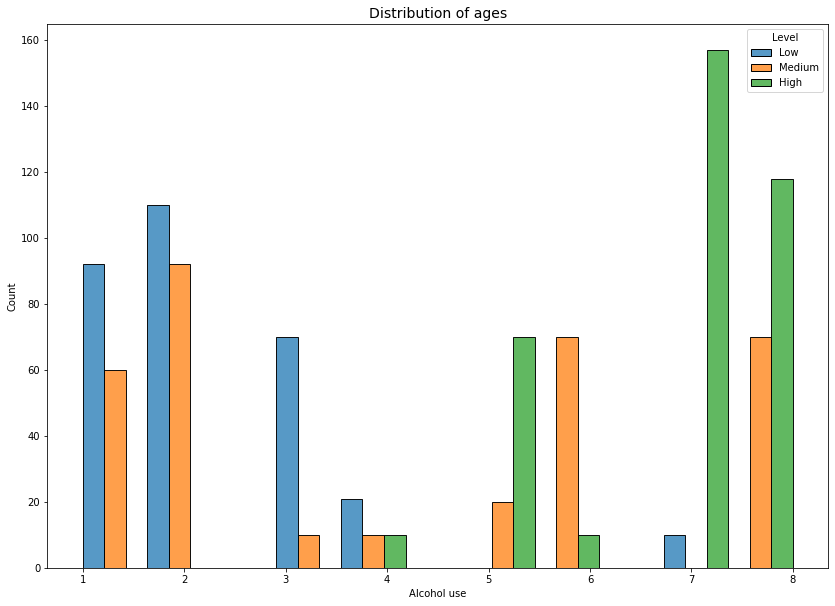

In [11]:
graph_hist('Alcohol use', 'Distribution of ages')

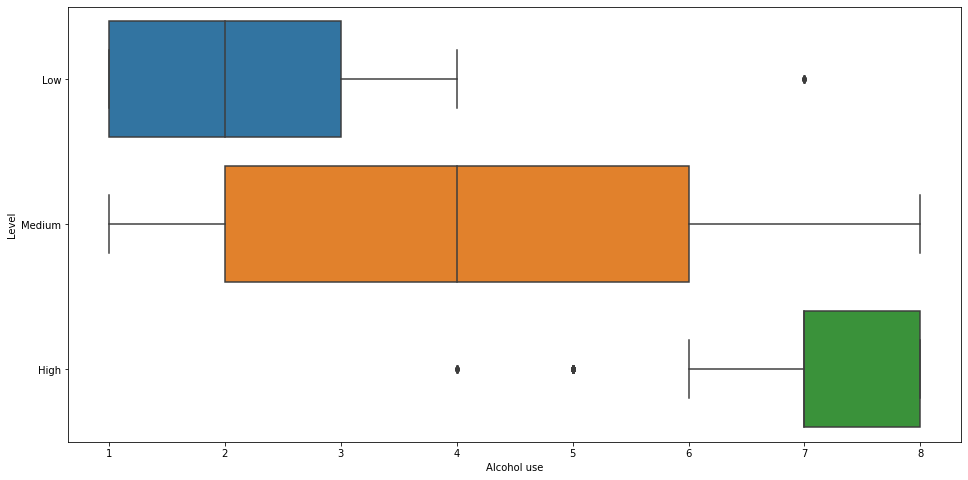

In [12]:
graph_box('Alcohol use')

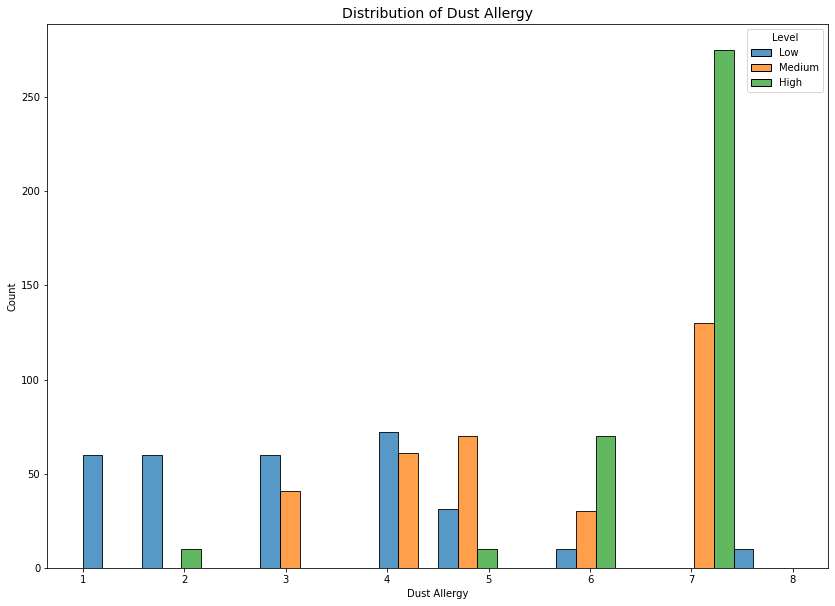

In [13]:
graph_hist('Dust Allergy', 'Distribution of Dust Allergy')

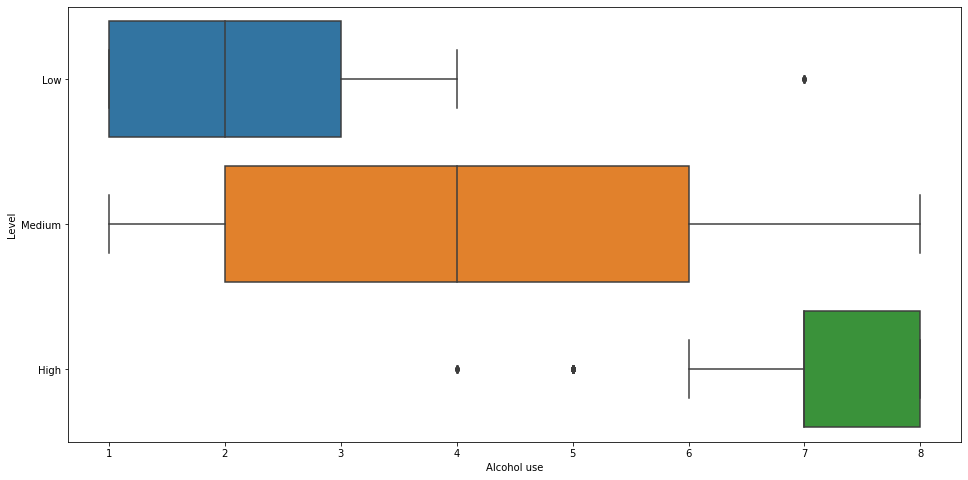

In [14]:
graph_box('Dust Allergy')

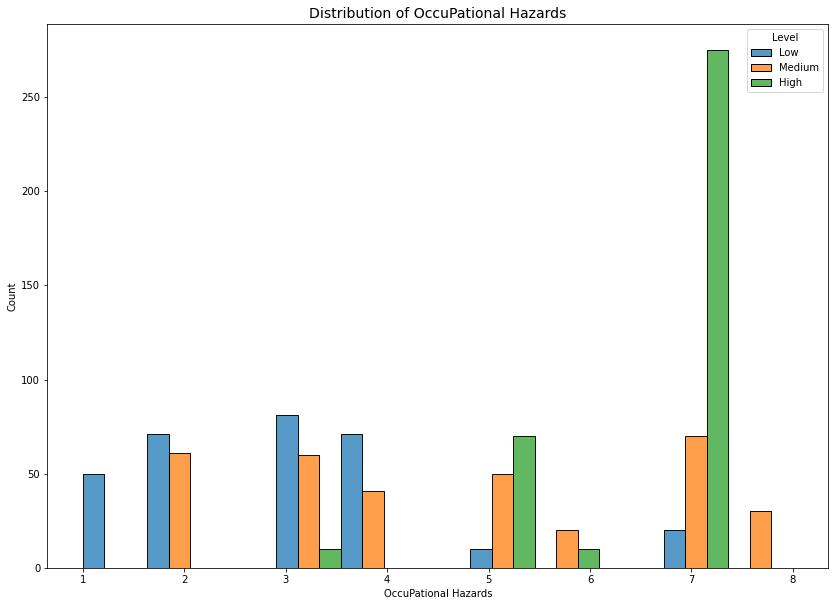

In [15]:
graph_hist('OccuPational Hazards', 'Distribution of OccuPational Hazards')

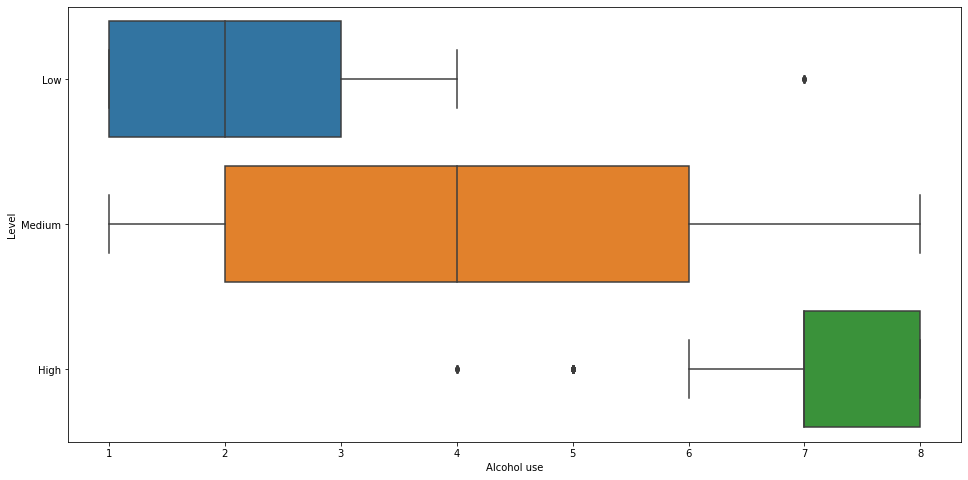

In [16]:
graph_box('OccuPational Hazards')

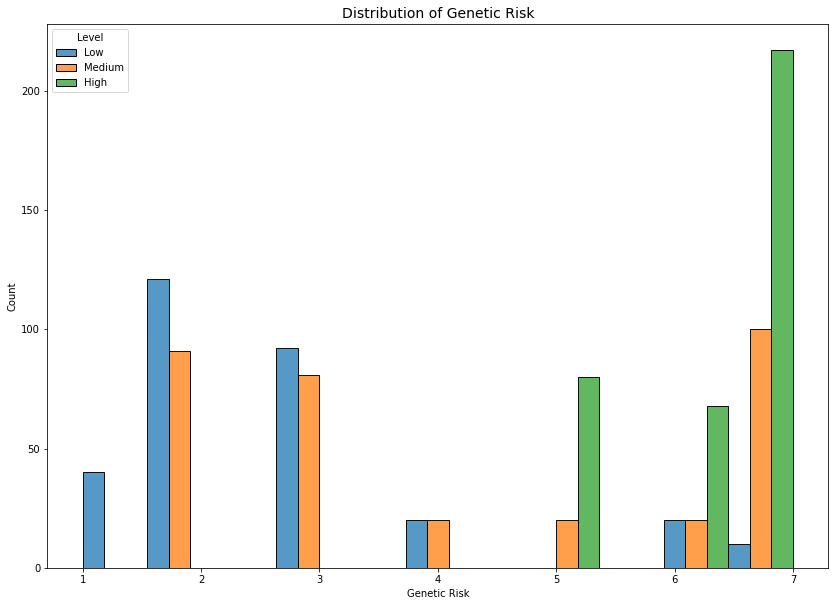

In [17]:
graph_hist('Genetic Risk', 'Distribution of Genetic Risk')

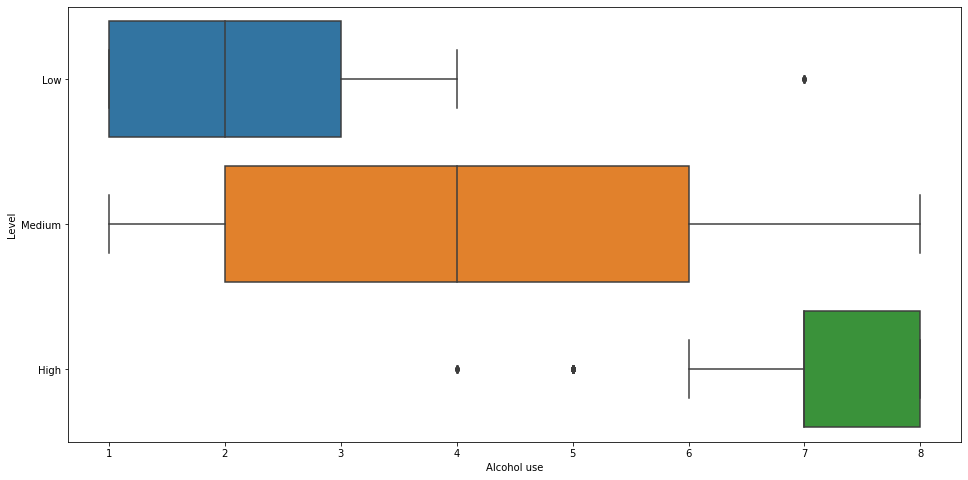

In [18]:
graph_box('Genetic Risk')

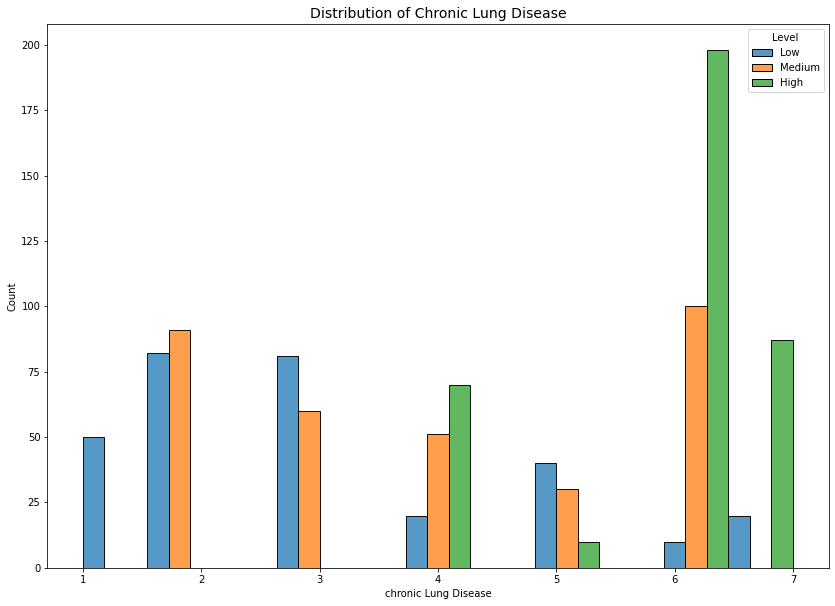

In [19]:
graph_hist('chronic Lung Disease', 'Distribution of Chronic Lung Disease')

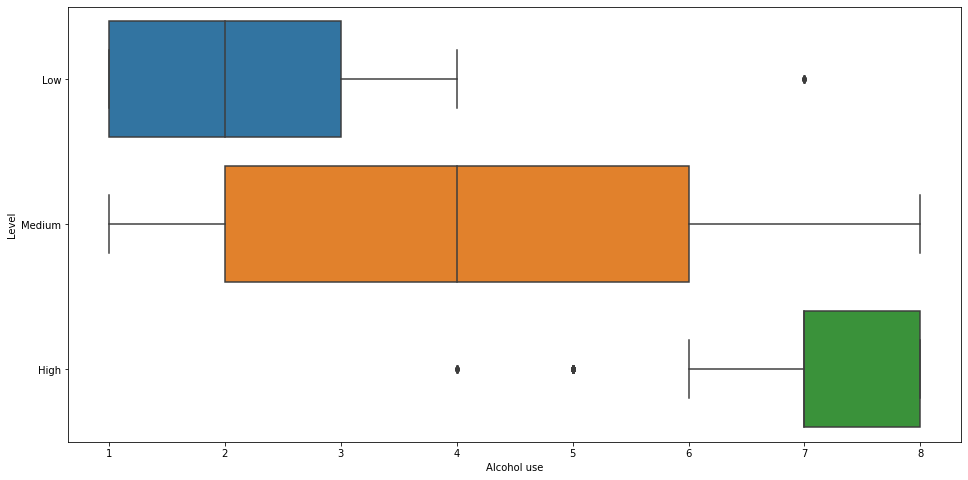

In [20]:
graph_box('chronic Lung Disease')

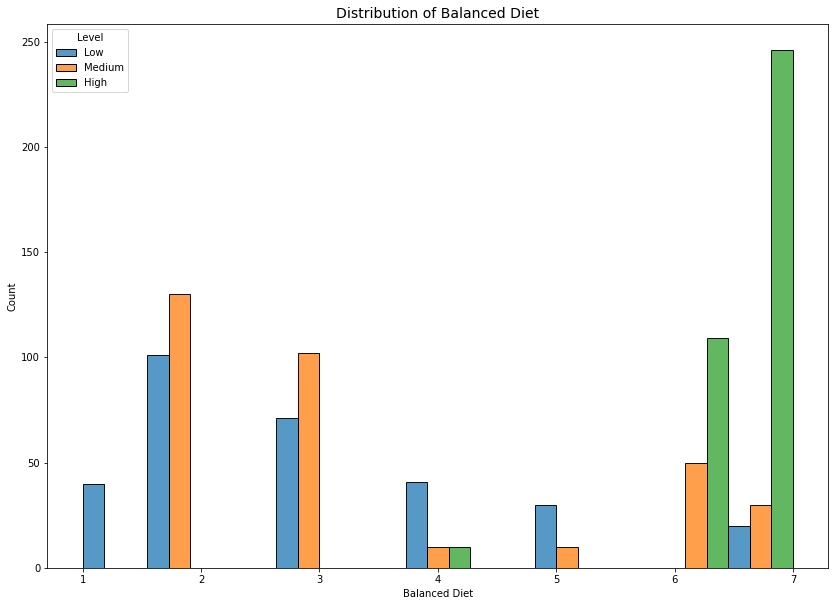

In [21]:
graph_hist('Balanced Diet', 'Distribution of Balanced Diet')

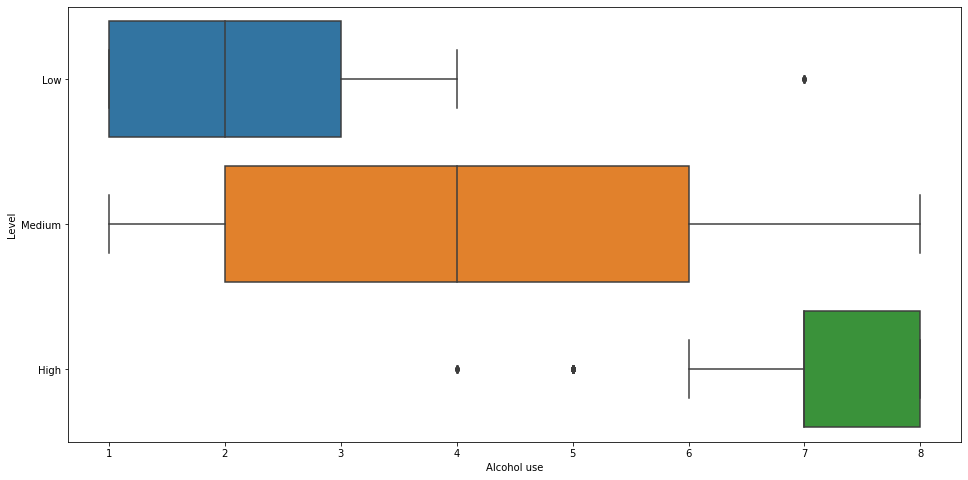

In [22]:
graph_box('Balanced Diet')

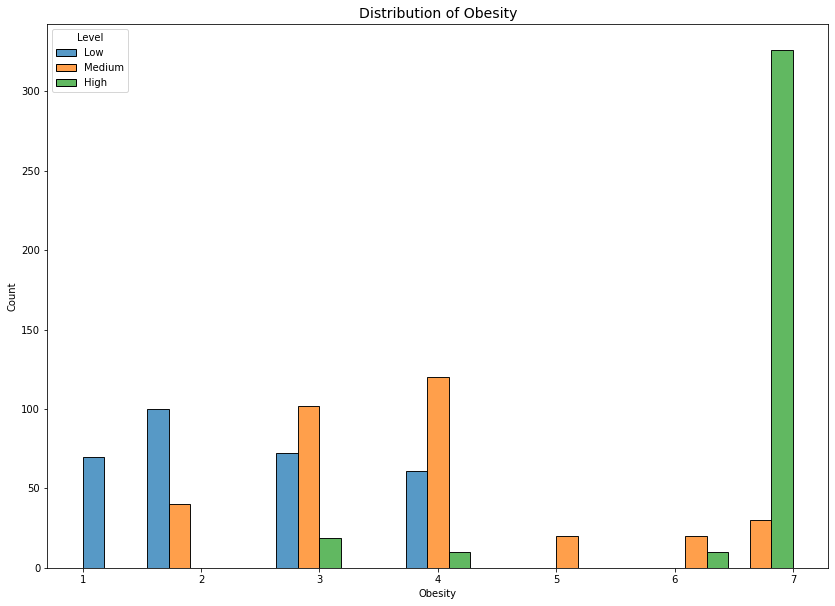

In [23]:
graph_hist('Obesity', 'Distribution of Obesity')

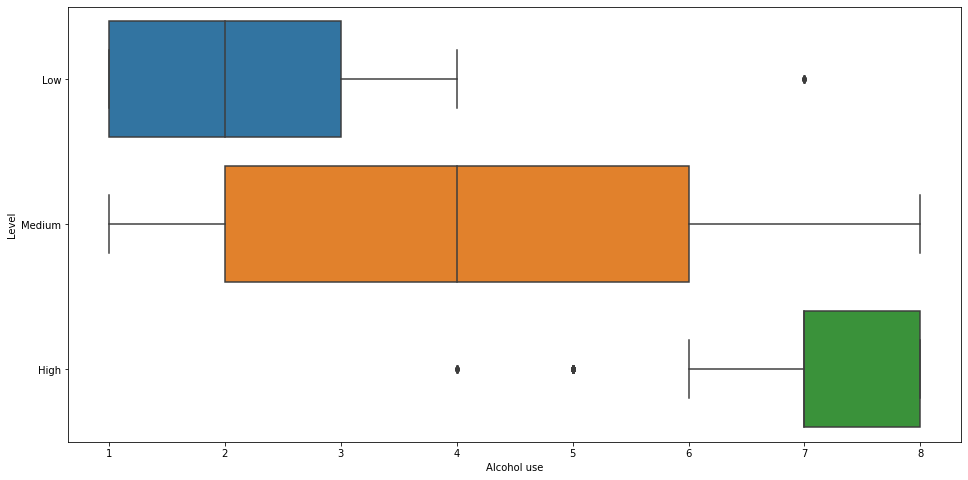

In [24]:
graph_box('Obesity')

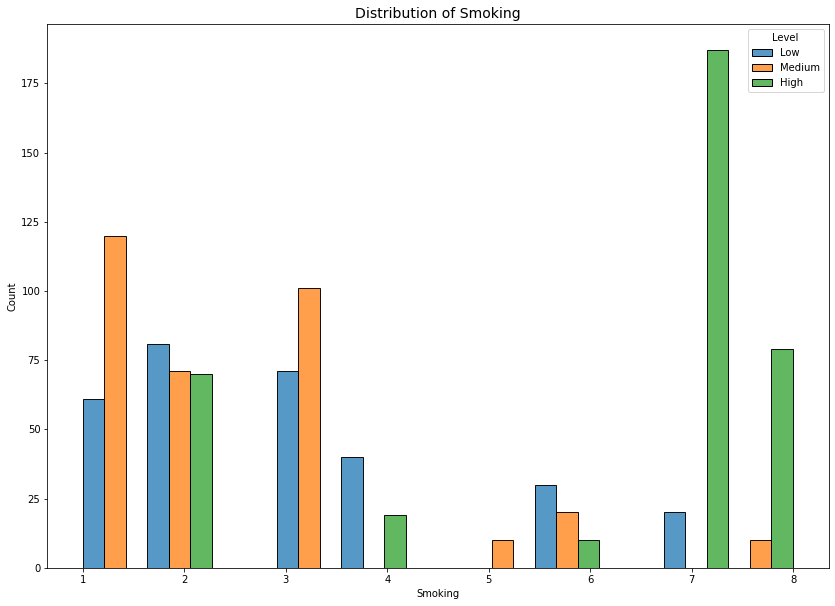

In [25]:
graph_hist('Smoking', 'Distribution of Smoking')

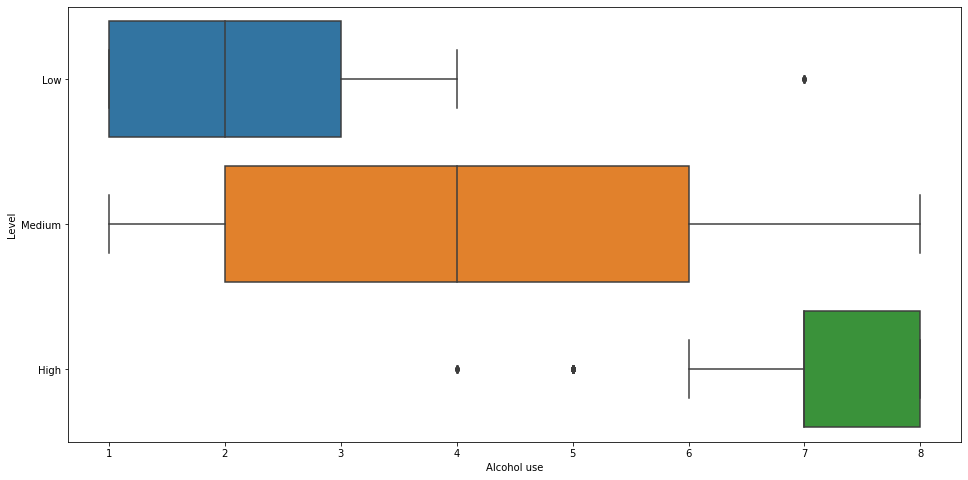

In [26]:
graph_box('Smoking')

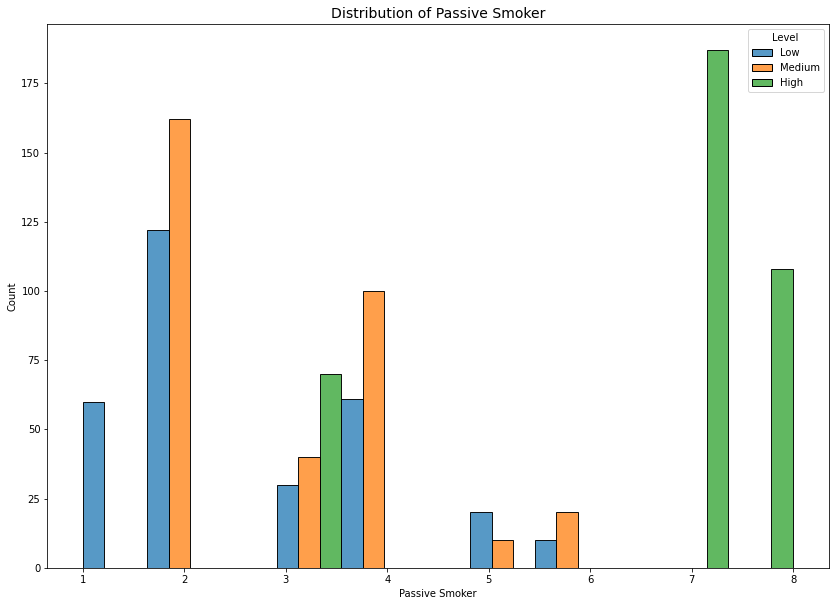

In [27]:
graph_hist('Passive Smoker', 'Distribution of Passive Smoker')

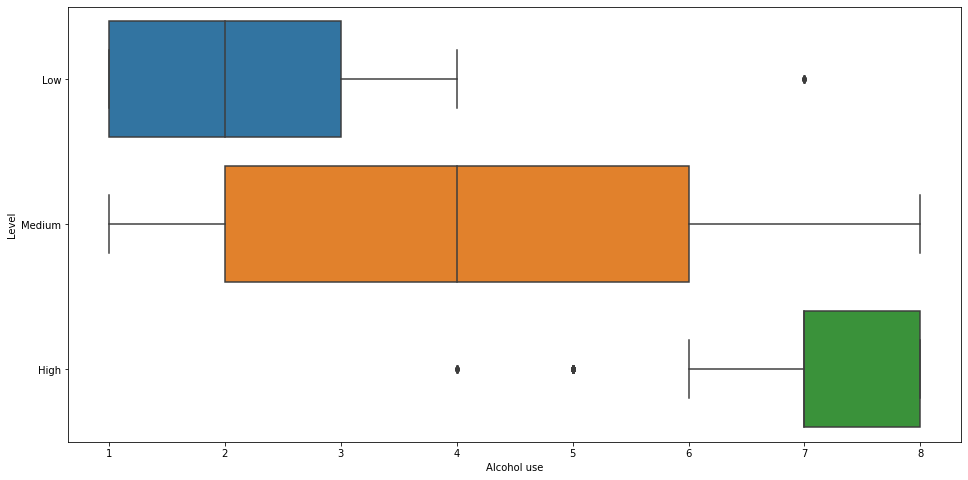

In [28]:
graph_box('Passive Smoker')

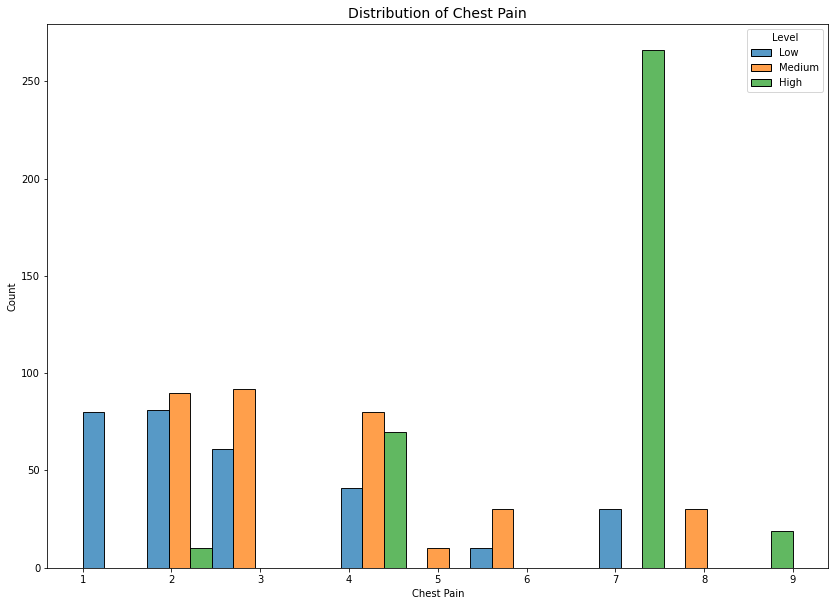

In [29]:
graph_hist('Chest Pain', 'Distribution of Chest Pain')

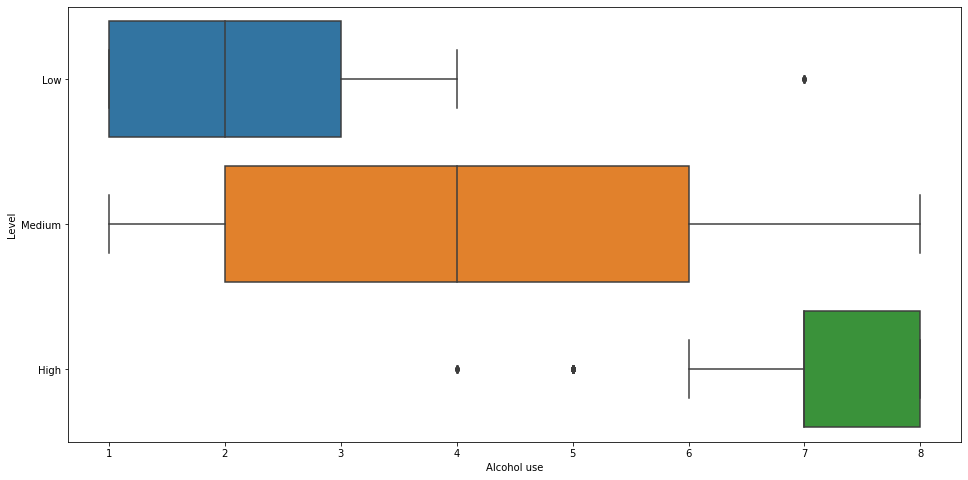

In [30]:
graph_box('Chest Pain')

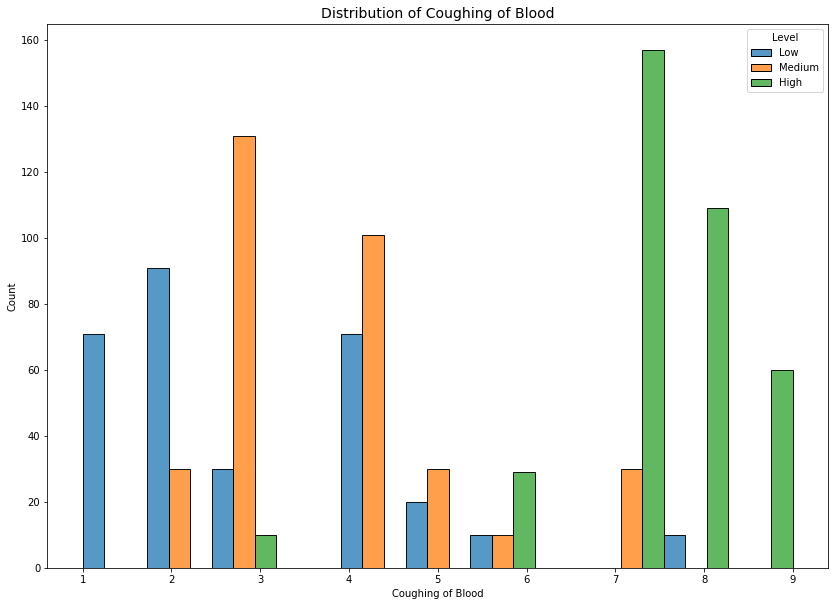

In [31]:
graph_hist('Coughing of Blood', 'Distribution of Coughing of Blood')

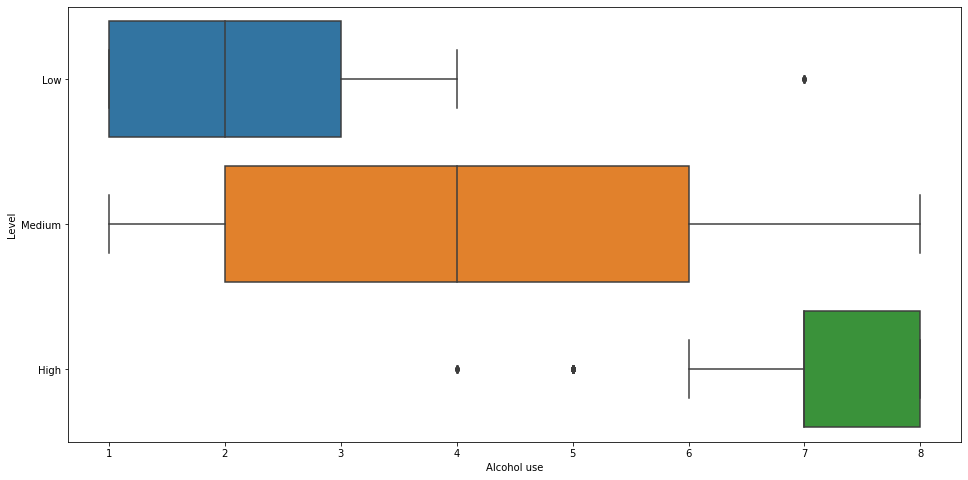

In [32]:
graph_box('Coughing of Blood')

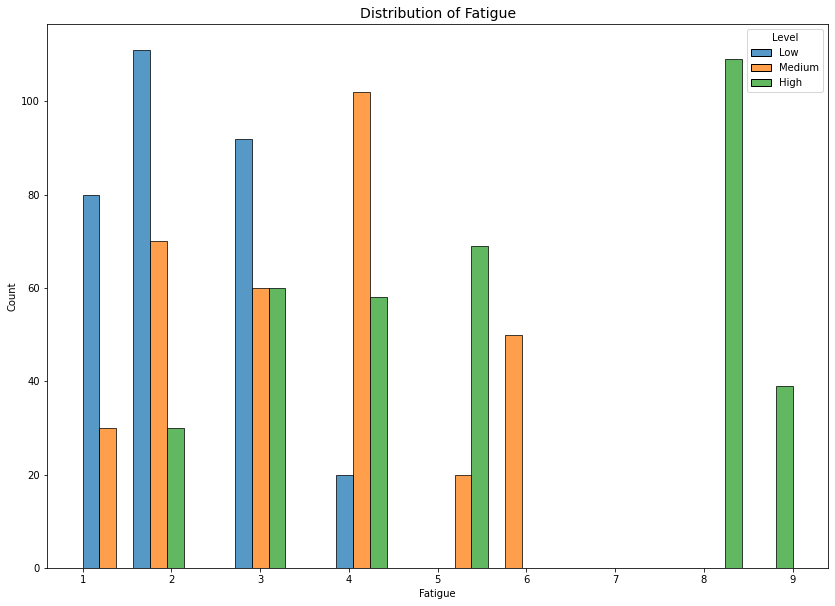

In [33]:
graph_hist('Fatigue', 'Distribution of Fatigue')

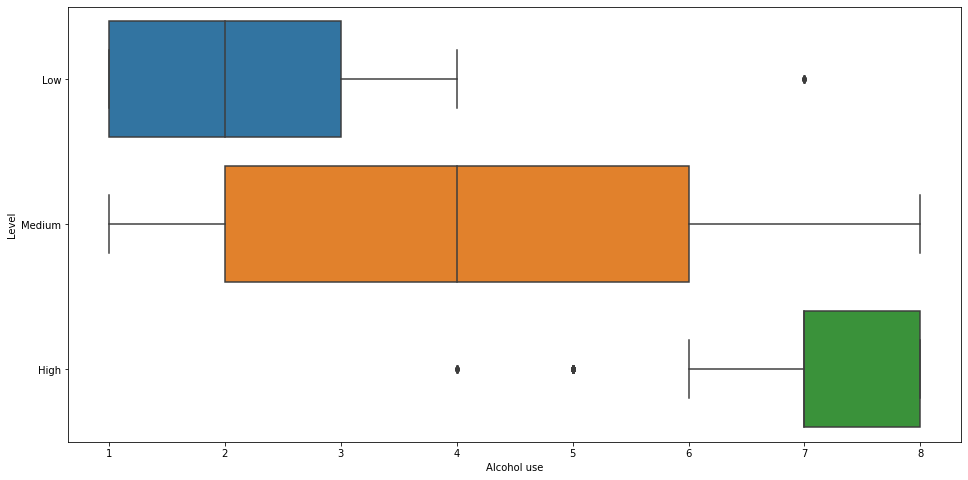

In [34]:
graph_box('Fatigue')

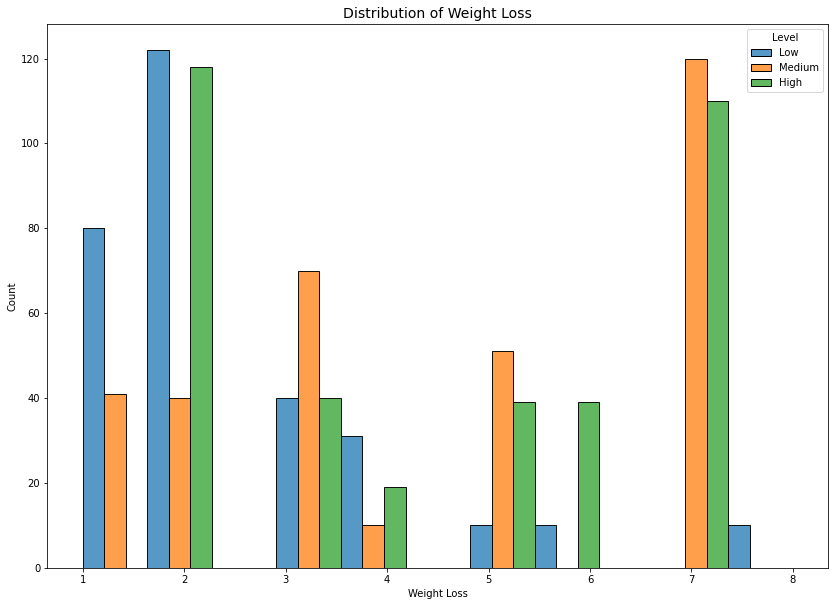

In [35]:
graph_hist('Weight Loss', 'Distribution of Weight Loss')

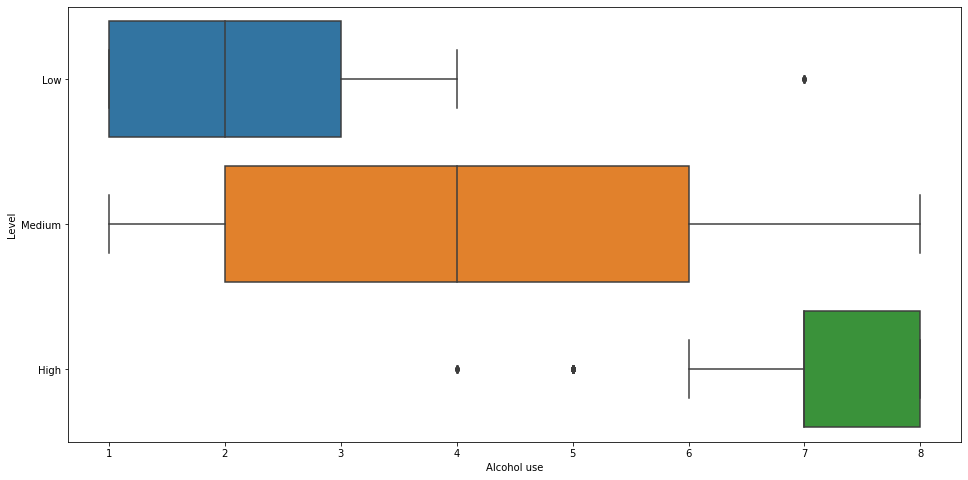

In [36]:
graph_box('Weight Loss')

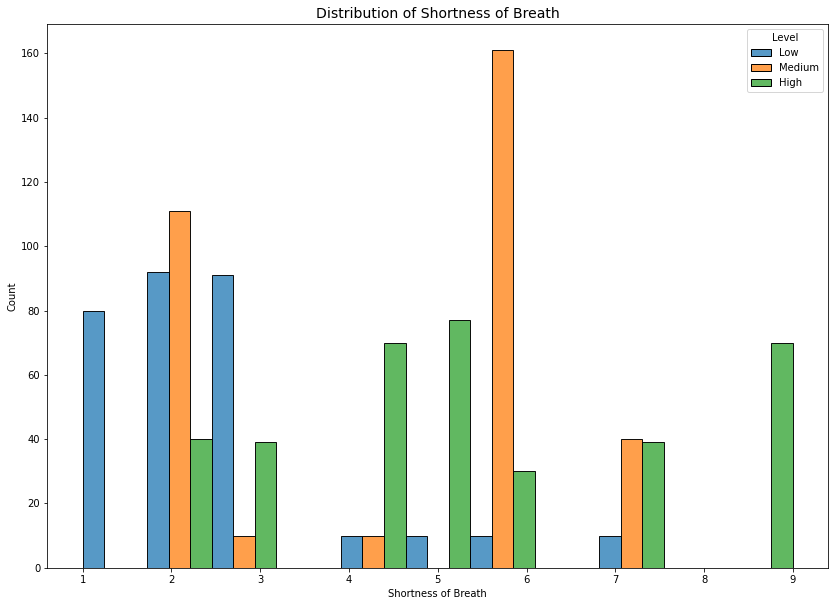

In [37]:
graph_hist('Shortness of Breath', 'Distribution of Shortness of Breath')

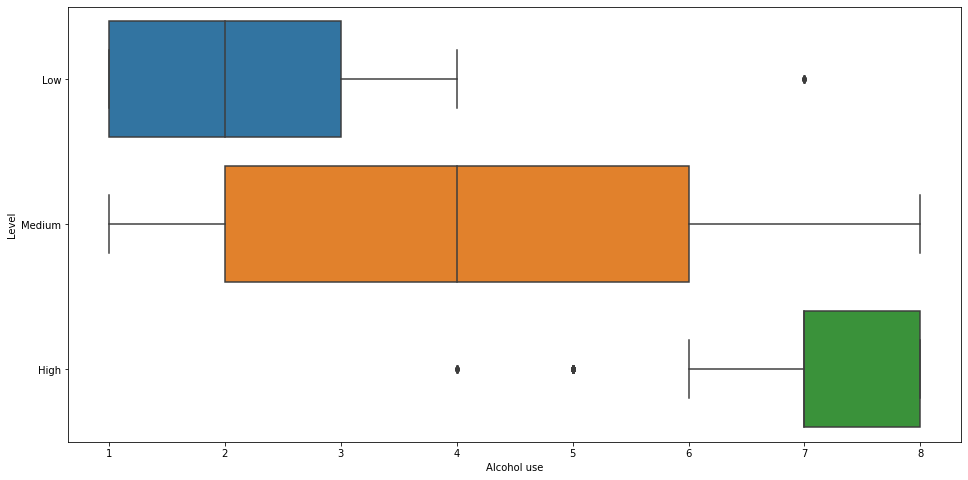

In [38]:
graph_box('Shortness of Breath')

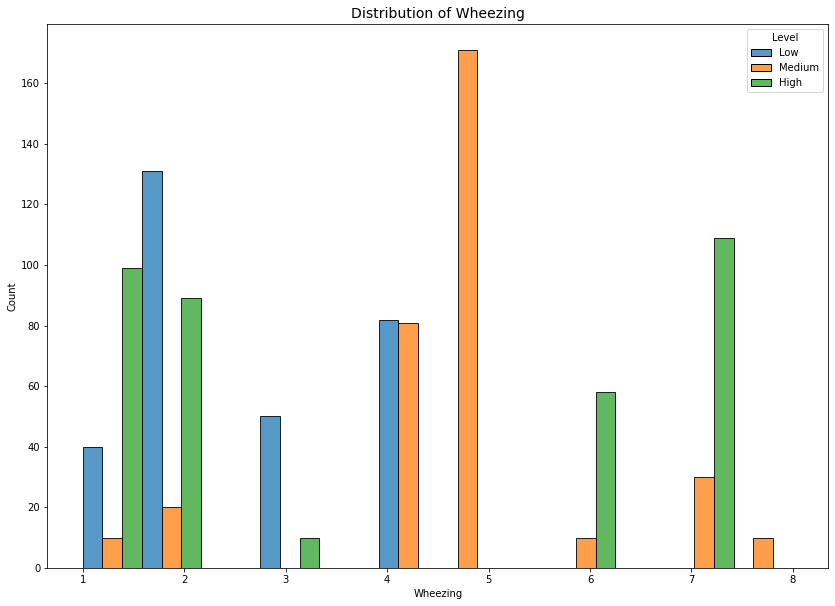

In [39]:
graph_hist('Wheezing', 'Distribution of Wheezing')

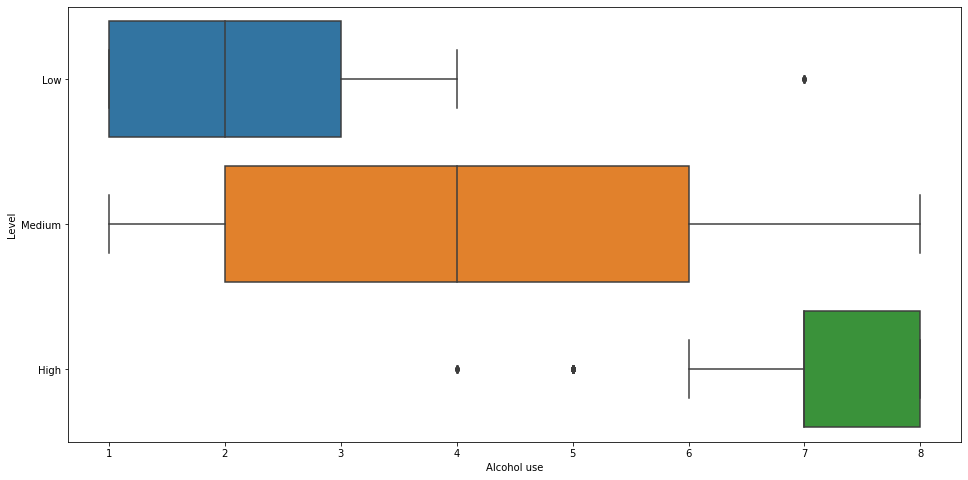

In [40]:
graph_box('Wheezing')

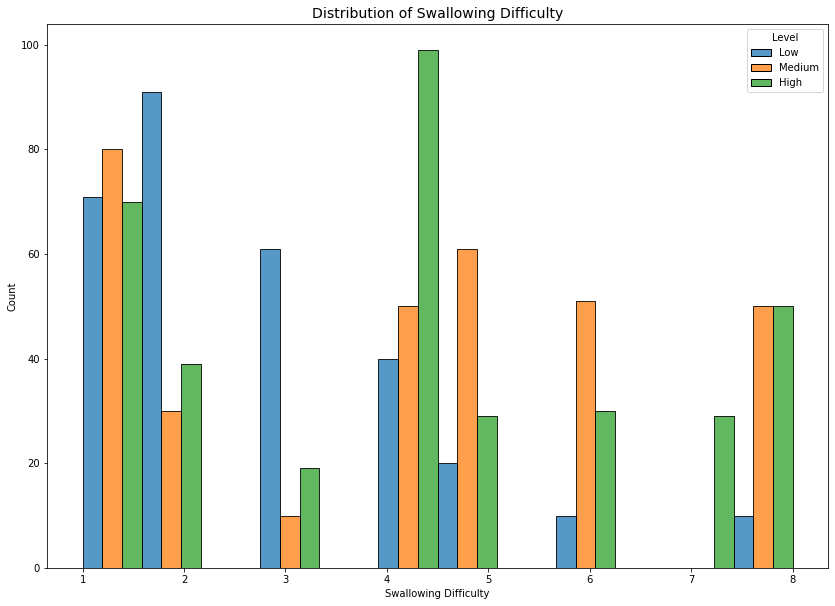

In [41]:
graph_hist('Swallowing Difficulty', 'Distribution of Swallowing Difficulty')

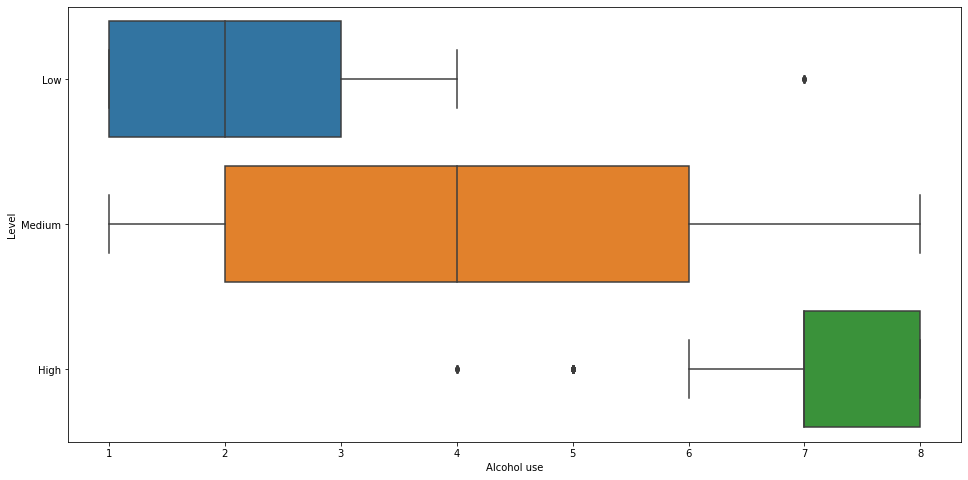

In [42]:
graph_box('Swallowing Difficulty')

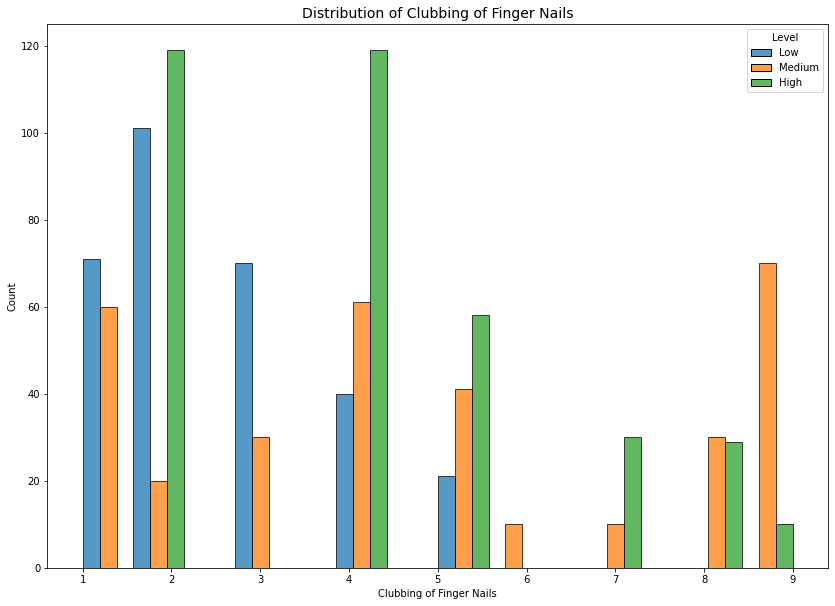

In [44]:
graph_hist('Clubbing of Finger Nails', 'Distribution of Clubbing of Finger Nails')

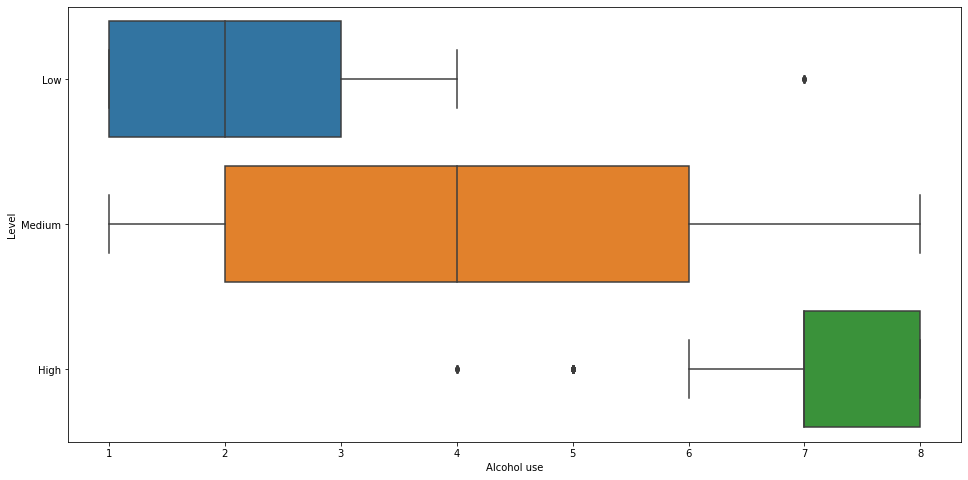

In [45]:
graph_box('Clubbing of Finger Nails')

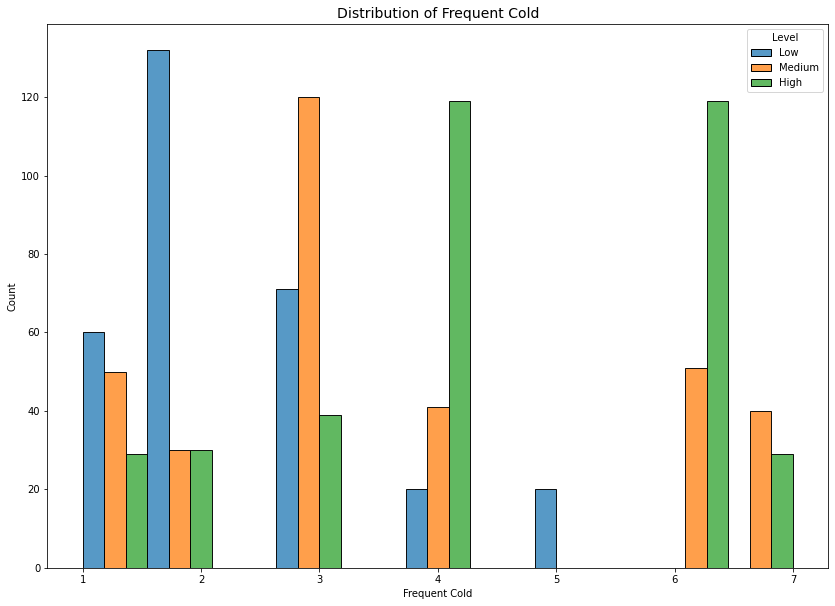

In [46]:
graph_hist('Frequent Cold', 'Distribution of Frequent Cold')

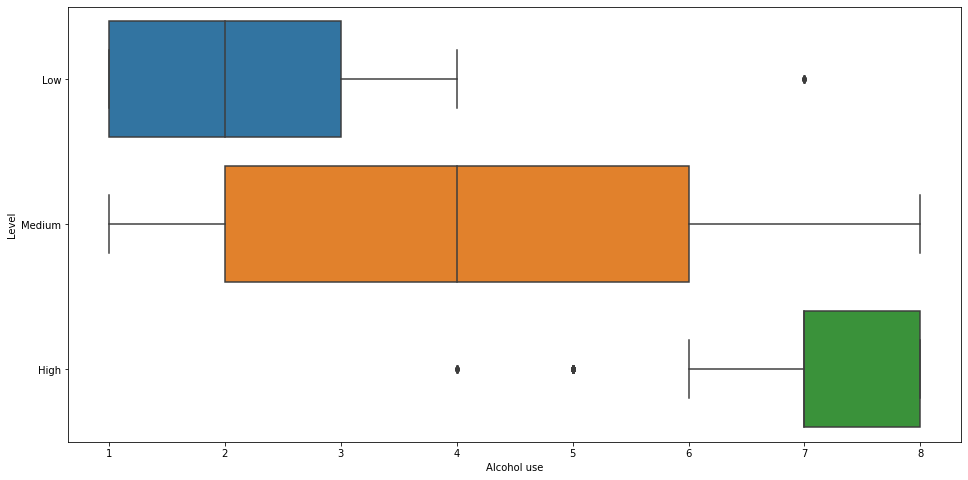

In [47]:
graph_box('Frequent Cold')

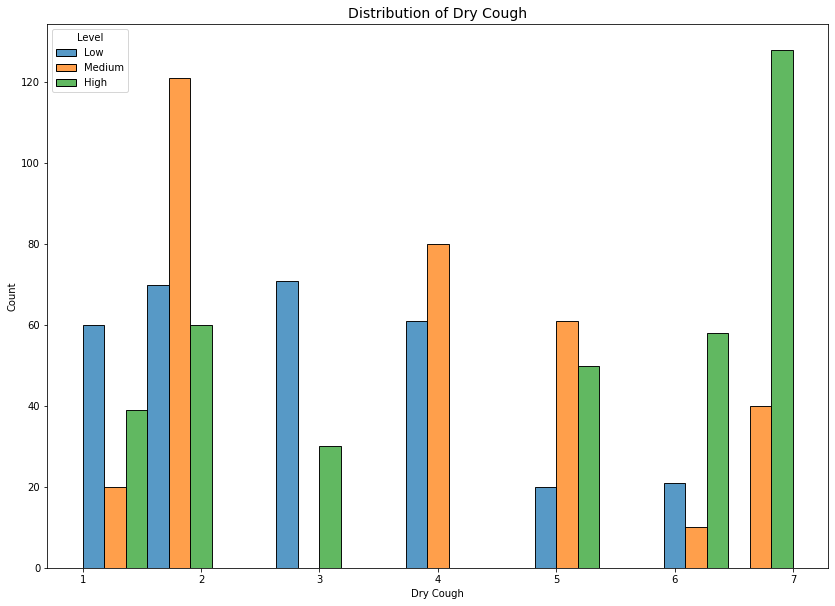

In [48]:
graph_hist('Dry Cough', 'Distribution of Dry Cough')

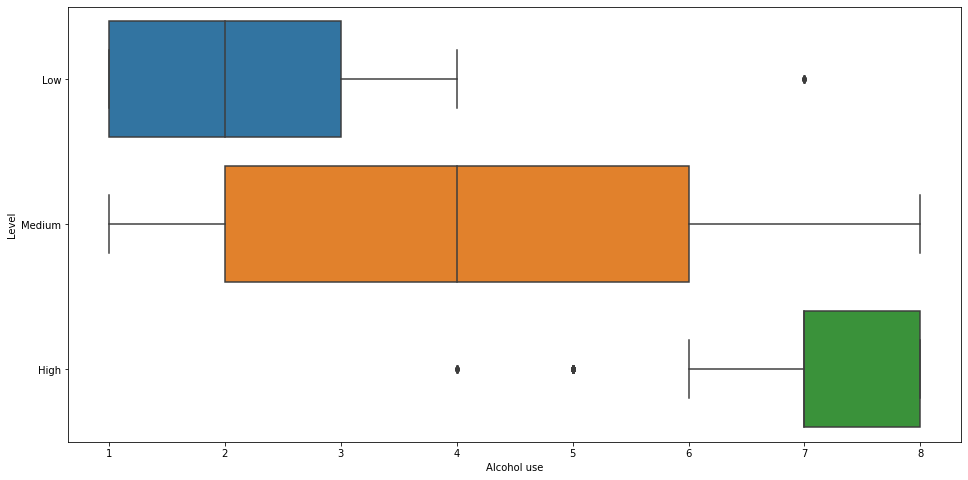

In [49]:
graph_box('Dry Cough')

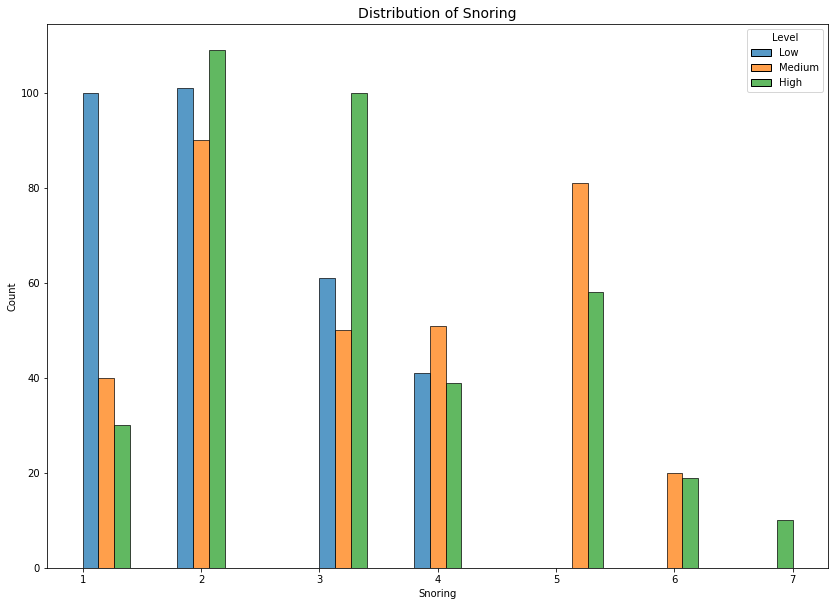

In [50]:
graph_hist('Snoring', 'Distribution of Snoring')

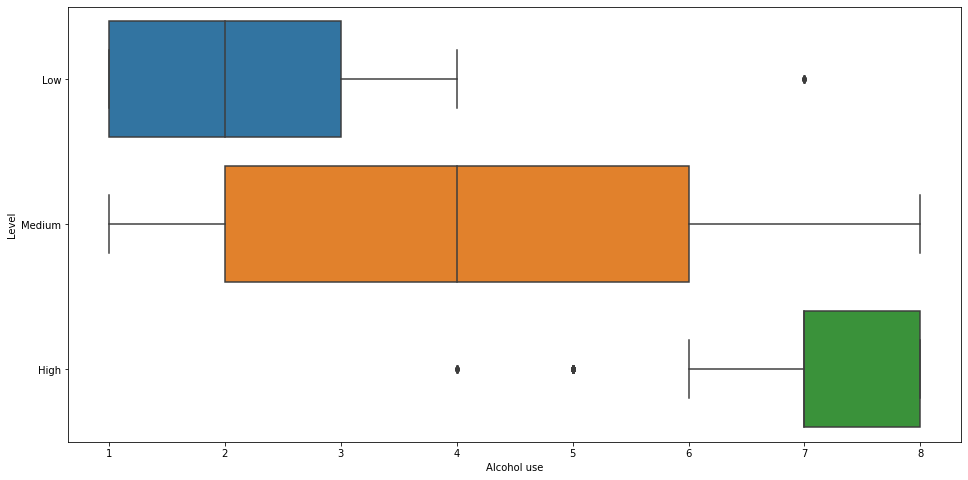

In [51]:
graph_box('Snoring')

<AxesSubplot:xlabel='Level', ylabel='count'>

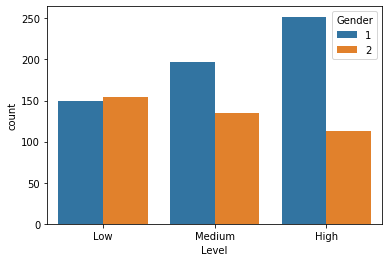

In [59]:
sns.countplot(data = dataset, x = 'Level', hue = 'Gender')

In [ ]:
fig = px.histogram(dataset, x = 'Level', y = 'Gender', color = 'Gender', barmode = 'group', 
                   title = 'Distribution of Level', text_auto = True)
fig.show()

# **What the data shows for us?**

It's possible to understand that according the level of column is increasing, higher is the level of people risk. There are few examples where exist some outliers. Perhaps, the medium risk isn't so objective, because it's the average between high and low values, and it isn't such a clear category to define specifically.

In [ ]:
dataset.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,2.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,3.000000


# **Standarding the data**

In [ ]:
standard = StandardScaler()
dataset_standard = standard.fit_transform(dataset)

In [ ]:
dataset_standard_2 = pd.DataFrame(data = dataset_standard, columns = dataset.keys())

Text(0.5, 1.0, 'Correlation Matriz')

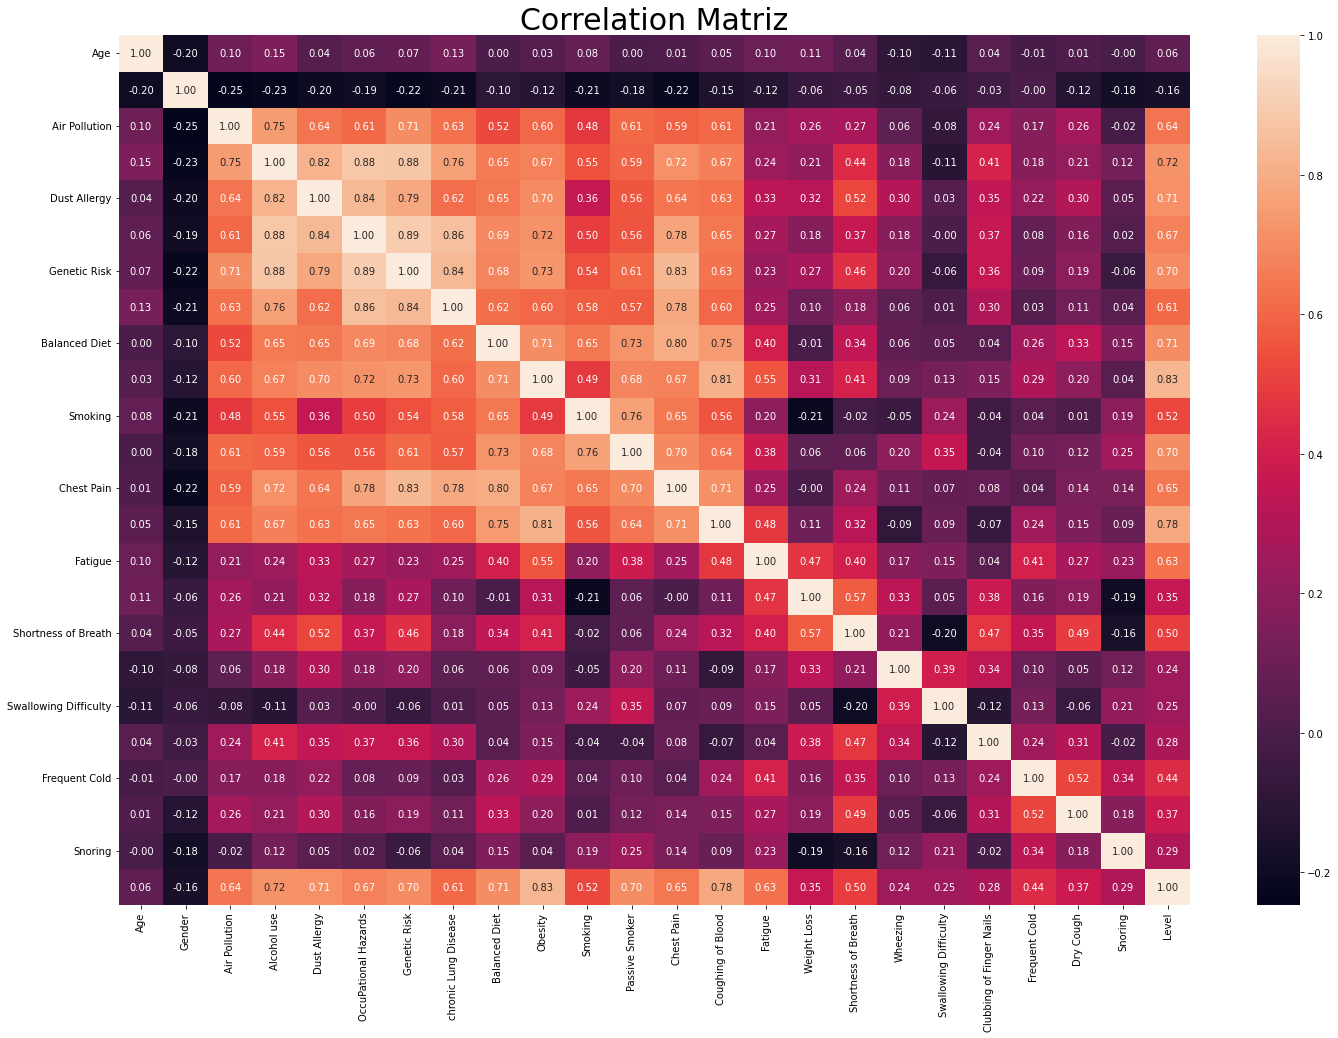

In [ ]:
correlation = dataset_standard_2.corr()
graph = sns.heatmap(correlation, annot = True, fmt = '.2f')
graph.figure.set_size_inches(24, 16)
graph.set_title('Correlation Matriz', fontsize = 30)

# **Separating the data between train and test**

In [ ]:
X = dataset_standard_2.iloc[:, :23].values
y = dataset.iloc[:, 23].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

# **Running the models**

Accuracy: 0.82


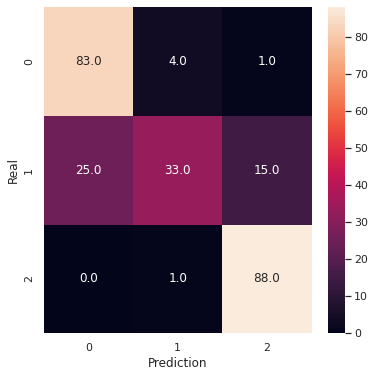

In [ ]:
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_predict = bnb.predict(X_test)

accuracy_bnb = accuracy_score(y_test, bnb_predict)

confusion_matrix = confusion_matrix(y_test, bnb_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_bnb))

Accuracy: 1.00


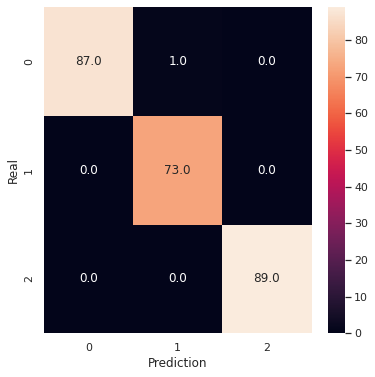

In [ ]:
from sklearn.metrics import confusion_matrix

svc = LinearSVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, svc_predict)

confusion_matrix = confusion_matrix(y_test, svc_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_svc))

Accuracy: 1.00


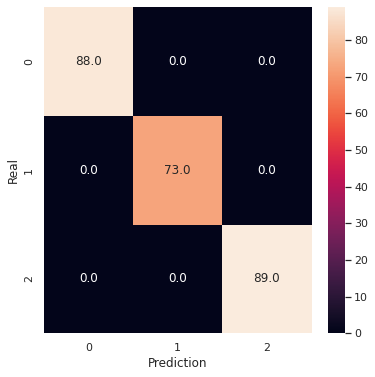

In [ ]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, knn_predict)

confusion_matrix = confusion_matrix(y_test, knn_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_knn))

Accuracy: 1.00


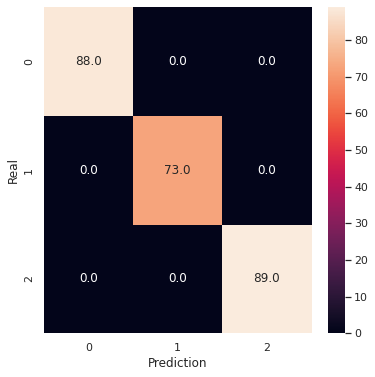

In [ ]:
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier(criterion='entropy', random_state = 1234)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, dtc_predict)

confusion_matrix = confusion_matrix(y_test, dtc_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_dtc))

Accuracy: 1.00


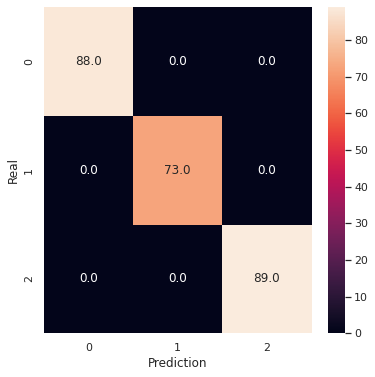

In [ ]:
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, rfc_predict)

confusion_matrix = confusion_matrix(y_test, rfc_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_rfc))

# **Calculating the ROC curve of each model**

In [ ]:
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
bnb_predict = lb.fit_transform(bnb_predict)
svc_predict = lb.fit_transform(svc_predict)
knn_predict = lb.fit_transform(knn_predict)
dtc_predict = lb.fit_transform(dtc_predict)
rfc_predict = lb.fit_transform(rfc_predict)

In [ ]:
bnb_auc = [0] * 3
bnb_fpr = [0] * 3
bnb_tpr = [0] * 3
bnb_thresholds = [0] * 3

svc_auc = [0] * 3
svc_fpr = [0] * 3
svc_tpr = [0] * 3
svc_thresholds = [0] * 3

knn_auc = [0] * 3
knn_fpr = [0] * 3
knn_tpr = [0] * 3
knn_thresholds = [0] * 3

dtc_auc = [0] * 3
dtc_fpr = [0] * 3
dtc_tpr = [0] * 3
dtc_thresholds = [0] * 3

rfc_auc = [0] * 3
rfc_fpr = [0] * 3
rfc_tpr = [0] * 3
rfc_thresholds = [0] * 3

In [ ]:
for i in range(len(bnb_auc)):
  bnb_auc[i] = roc_auc_score(y_test[:, i], bnb_predict[:, i], multi_class = 'ovr', average = 'macro')
  svc_auc[i] = roc_auc_score(y_test[:, i], svc_predict[:, i], multi_class = 'ovr', average = 'macro')
  knn_auc[i] = roc_auc_score(y_test[:, i], knn_predict[:, i], multi_class = 'ovr', average = 'macro')
  dtc_auc[i] = roc_auc_score(y_test[:, i], dtc_predict[:, i], multi_class = 'ovr', average = 'macro')
  rfc_auc[i] = roc_auc_score(y_test[:, i], rfc_predict[:, i], multi_class = 'ovr', average = 'macro')
  bnb_fpr[i], bnb_tpr[i], bnb_thresholds[i] = roc_curve(y_test[:, i], bnb_predict[:, i])
  svc_fpr[i], svc_tpr[i], svc_thresholds[i] = roc_curve(y_test[:, i], svc_predict[:, i])
  knn_fpr[i], knn_tpr[i], knn_thresholds[i] = roc_curve(y_test[:, i], knn_predict[:, i])
  dtc_fpr[i], dtc_tpr[i], dtc_thresholds[i] = roc_curve(y_test[:, i], dtc_predict[:, i])
  rfc_fpr[i], rfc_tpr[i], rfc_thresholds[i] = roc_curve(y_test[:, i], rfc_predict[:, i])

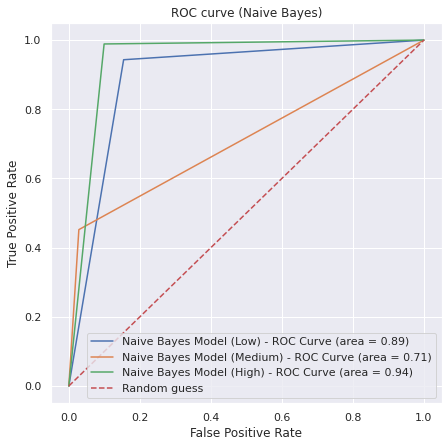

In [ ]:
plt.figure(figsize = (7, 7))
plt.plot(bnb_fpr[0], bnb_tpr[0], label = 'Naive Bayes Model (Low) - ROC Curve (area = %.2f)' %bnb_auc[0])
plt.plot(bnb_fpr[1], bnb_tpr[1], label = 'Naive Bayes Model (Medium) - ROC Curve (area = %.2f)' %bnb_auc[1])
plt.plot(bnb_fpr[2], bnb_tpr[2], label = 'Naive Bayes Model (High) - ROC Curve (area = %.2f)' %bnb_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (Naive Bayes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

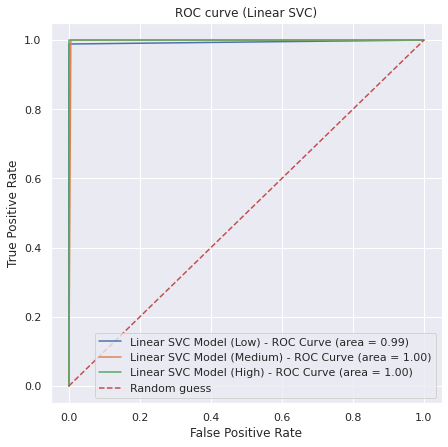

In [ ]:
plt.figure(figsize = (7, 7))
plt.plot(svc_fpr[0], svc_tpr[0], label = 'Linear SVC Model (Low) - ROC Curve (area = %.2f)' %svc_auc[0])
plt.plot(svc_fpr[1], svc_tpr[1], label = 'Linear SVC Model (Medium) - ROC Curve (area = %.2f)' %svc_auc[1])
plt.plot(svc_fpr[2], svc_tpr[2], label = 'Linear SVC Model (High) - ROC Curve (area = %.2f)' %svc_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (Linear SVC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

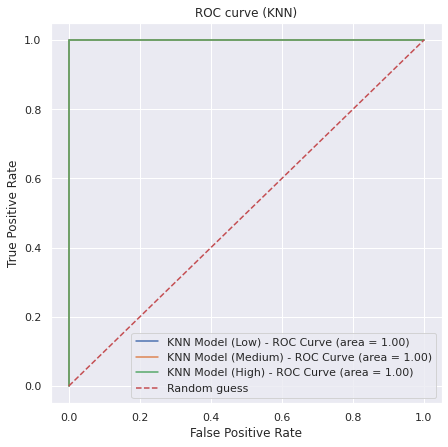

In [ ]:
plt.figure(figsize = (7, 7))
plt.plot(knn_fpr[0], knn_tpr[0], label = 'KNN Model (Low) - ROC Curve (area = %.2f)' %knn_auc[0])
plt.plot(knn_fpr[1], knn_tpr[1], label = 'KNN Model (Medium) - ROC Curve (area = %.2f)' %knn_auc[1])
plt.plot(knn_fpr[2], knn_tpr[2], label = 'KNN Model (High) - ROC Curve (area = %.2f)' %knn_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

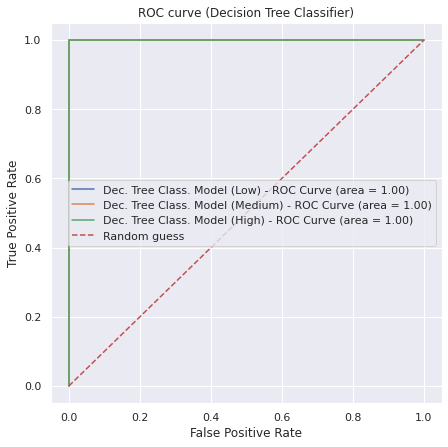

In [ ]:
plt.figure(figsize = (7, 7))
plt.plot(dtc_fpr[0], dtc_tpr[0], label = 'Dec. Tree Class. Model (Low) - ROC Curve (area = %.2f)' %dtc_auc[0])
plt.plot(dtc_fpr[1], dtc_tpr[1], label = 'Dec. Tree Class. Model (Medium) - ROC Curve (area = %.2f)' %dtc_auc[1])
plt.plot(dtc_fpr[2], dtc_tpr[2], label = 'Dec. Tree Class. Model (High) - ROC Curve (area = %.2f)' %dtc_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (Decision Tree Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

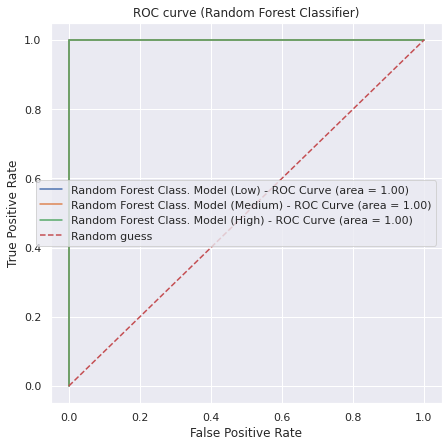

In [ ]:
plt.figure(figsize = (7, 7))
plt.plot(rfc_fpr[0], rfc_tpr[0], label = 'Random Forest Class. Model (Low) - ROC Curve (area = %.2f)' %rfc_auc[0])
plt.plot(rfc_fpr[1], rfc_tpr[1], label = 'Random Forest Class. Model (Medium) - ROC Curve (area = %.2f)' %rfc_auc[1])
plt.plot(rfc_fpr[2], rfc_tpr[2], label = 'Random Forest Class. Model (High) - ROC Curve (area = %.2f)' %rfc_auc[2])
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve (Random Forest Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

# **Conclusion**

Except the Naive Bayes, the rest of models have satisfied number of accuracy. However, the test data was small (250) to be sure that these models will be right every time when it insert new informations to predict. It'll be necessary a bigger dataset to train more and to analysis if the accuracy'll be the same or it will be decrease.